In [6]:
import oineus as oin
import numpy as np
import torch
import diode


def get_interface_diagram_and_filtration(points, n_atoms_per_mol):
    points = np.asarray(points)
    simplices = diode.fill_alpha_shapes(points)
    fil = oin.Filtration_double([oin.Simplex_double(s[0], s[1]) for s in simplices])

    def is_multi(sigma):
        return len(set(v // n_atoms_per_mol for v in sigma.vertices)) >= 2
    fil = fil.subfiltration(is_multi)

    def recalculate_filtration_value(cell):
        parts = [v // n_atoms_per_mol for v in cell.vertices]
        n_parts = len(set(parts))
        p_agg = [np.array([0.0, 0.0, 0.0]) for _ in range(n_parts)]
        weights = [0 for _ in range(n_parts)]
        for i, p in enumerate(parts):
            p_agg[p] += points[cell.vertices[i]]
            weights[p] += 1
        bcs = [p_agg[i] / weights[i] for i in range(n_parts)]
        filtration_value = sum([np.linalg.norm(bcs[i] - bcs[j]) for i in range(n_parts) for j in range(i + 1, n_parts)]) / n_parts
        # convert to native Python float from numpy
        return float(filtration_value)

    new_values = [recalculate_filtration_value(cell) for cell in fil]
    fil.set_values(new_values, 1)

    dcmp = oin.Decomposition(fil, True)
    params = oin.ReductionParams()
    params.clearing_opt = False
    dcmp.reduce(params)
    dgm = dcmp.diagram(fil, include_inf_points=False)
    return dgm, fil

#points = get_points("test.txt")
#get_interface_diagram_and_filtration(points, 1206)

NameError: name 'get_points' is not defined

(<Figure size 1500x1000 with 6 Axes>,
 array([<Axes: title={'center': 'kernel'}>,
        <Axes: title={'center': 'relative'}>,
        <Axes: title={'center': 'cokernel'}>,
        <Axes: title={'center': 'sub-complex'}>,
        <Axes: title={'center': 'image'}>,
        <Axes: title={'center': 'complex'}>], dtype=object))

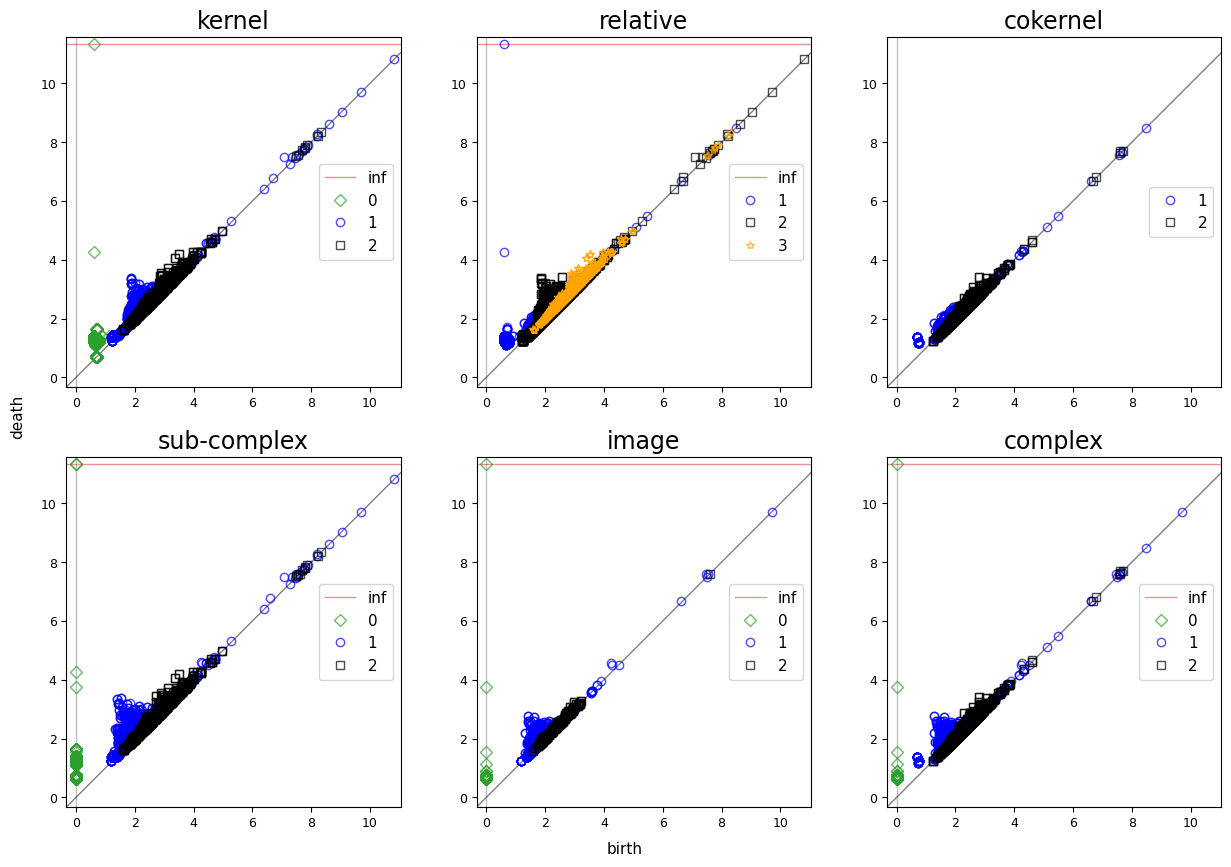

In [11]:
def get_points(file):
    points = []
    with open(file) as f:
        for (i, line) in enumerate(f):
            if i >= 3:
                x, y, z = line.split()
                points.append(np.array([float(x), float(y), float(z)]))
    return points

import chromatic_tda as chro
points = get_points("test.txt")
labels = [i % 2 for i in range(len(points))]

chro_alpha = chro.ChromaticAlphaComplex(points, labels) 
simplicial_complex = chro_alpha.get_simplicial_complex(
             sub_complex="mono-chromatic",
             #full_complex="all",
             #relative="mono-chromatic",
)  # these options make sense for three colors; for two use, e.g., just sub_complex='mono-chromatic'
six_pack = simplicial_complex.bars_six_pack()
chro.plot_six_pack(six_pack)

In [13]:
points[1:3]

[array([ 55.89519275,  92.63843304, 144.26934821]),
 array([ 54.96269427,  93.70372276, 144.2915607 ])]